In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.express import choropleth
import plotly.express as px


DATASET SORUCE: https://www.kaggle.com/datasets/mohammadrezagim/who-covid-19-global-data

In [2]:
covid=pd.read_csv("/kaggle/input/who-covid-19-global-data/WHO-COVID-19-global-data.csv")
covid

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
323263,2023-09-23,ZW,Zimbabwe,AFRO,0,265748,0,5718
323264,2023-09-24,ZW,Zimbabwe,AFRO,0,265748,0,5718
323265,2023-09-25,ZW,Zimbabwe,AFRO,0,265748,0,5718
323266,2023-09-26,ZW,Zimbabwe,AFRO,0,265748,0,5718


In [3]:
covid.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [4]:
covid.drop(columns=["Date_reported","Country_code","Cumulative_cases","Cumulative_deaths"],inplace=True)


In [5]:
covid["New_cases"]=covid["New_cases"].astype("int")
covid["New_deaths"]=covid["New_deaths"].astype("int")

In [6]:
covid.columns

Index(['Country', 'WHO_region', 'New_cases', 'New_deaths'], dtype='object')

# Total number of cases and deaths by country

In [7]:
new_covid=covid.groupby(["Country","WHO_region"])[["New_cases", "New_deaths"]].sum()

In [8]:
new_covid

,,New_cases,New_deaths
Country,WHO_region,,
Afghanistan,EMRO,225983,7947
Albania,EURO,334090,3604
Algeria,AFRO,271852,6881
American Samoa,WPRO,8341,34
Andorra,EURO,48015,159
...,...,...,...
Wallis and Futuna,WPRO,3550,8
Yemen,EMRO,11945,2159
Zambia,AFRO,349287,4069


In [9]:
country_cases=new_covid.groupby("Country")["New_cases"].sum()
country_cases=country_cases.sort_values(ascending=False).head(50) #Since not all values fit in a single graph, we include the 50 highest countries


In [10]:
country_cases

Country
United States of America      103436829
China                          99311610
India                          44998525
France                         38997490
Germany                        38437756
Brazil                         37720419
Republic of Korea              34571873
Japan                          33803572
Italy                          26007789
The United Kingdom             24715857
Russian Federation             23014969
Türkiye                        17004677
Spain                          13980340
Viet Nam                       11623571
Australia                      11600795
Argentina                      10054576
Netherlands                     8617412
Mexico                          7686132
Iran (Islamic Republic of)      7616791
Indonesia                       6813429
Poland                          6520928
Colombia                        6381318
Austria                         6081287
Portugal                        5610180
Ukraine                         

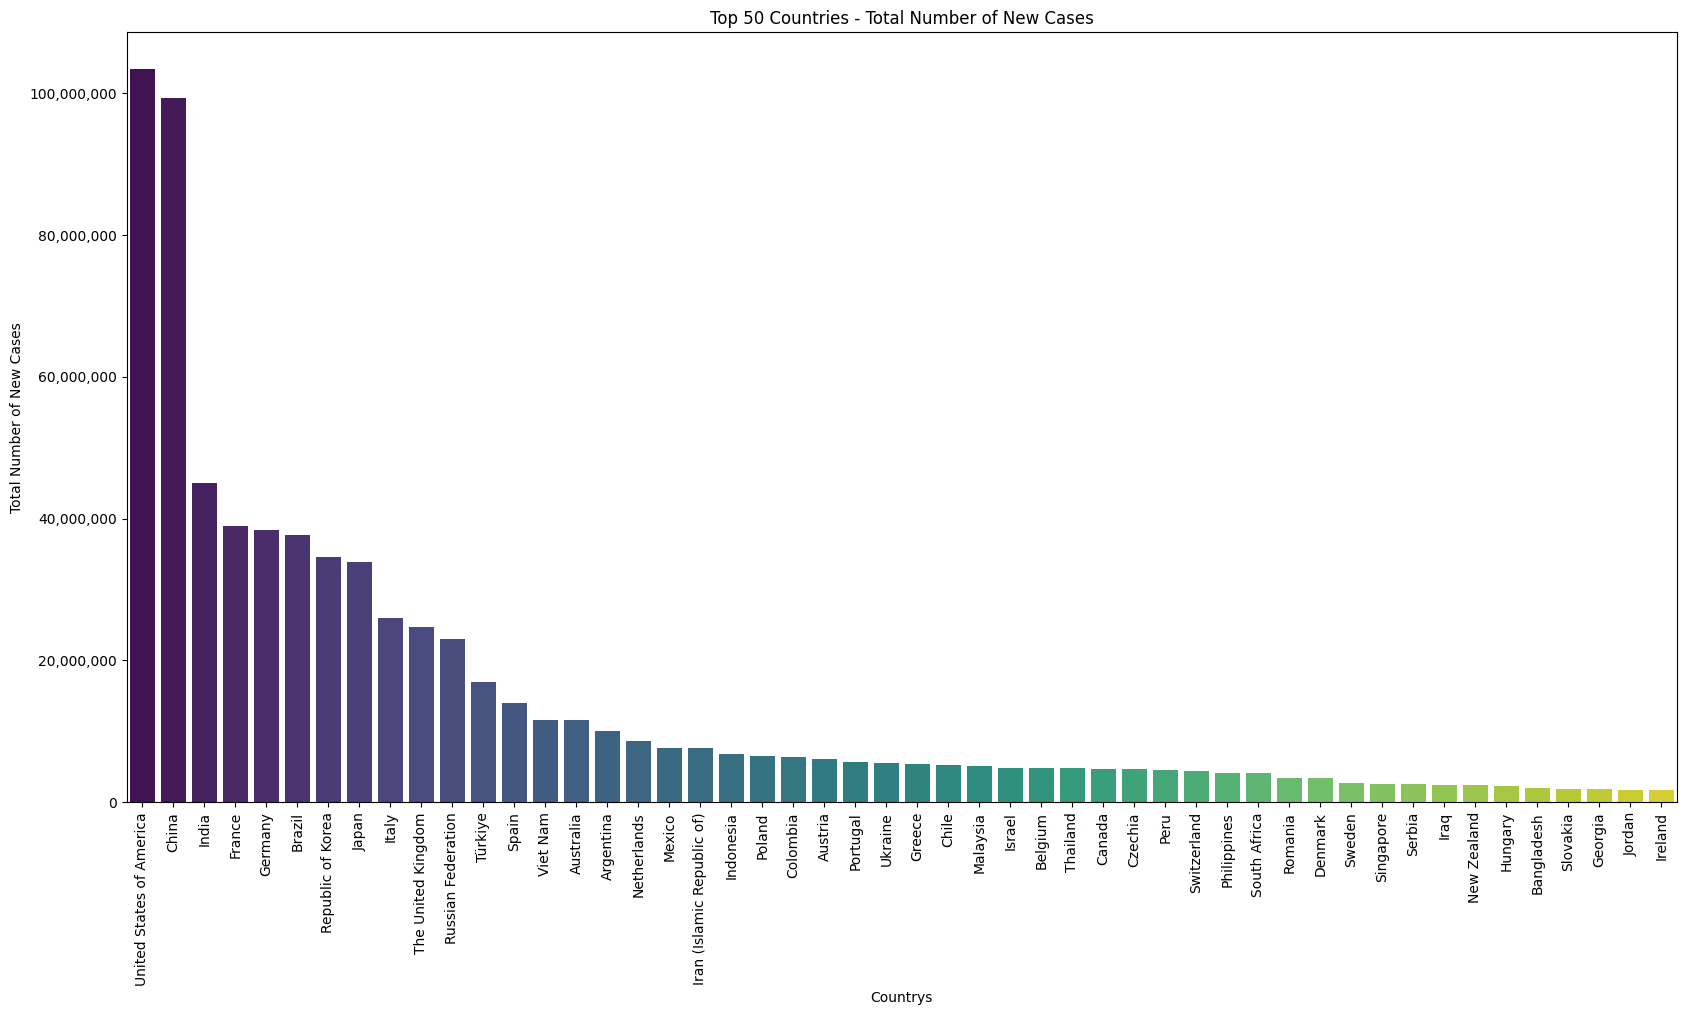

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(x=country_cases.index,y=country_cases.values,palette="viridis")

plt.title('Top 50 Countries - Total Number of New Cases')  
plt.xlabel('Countrys')  
plt.ylabel('Total Number of New Cases')  # y-ekseni etiketi
plt.xticks(rotation=90)  
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) #Prints the values in the graph as integers
plt.show()  

In [12]:
country_deaths=new_covid.groupby("Country")["New_deaths"].sum()
country_deaths=country_deaths.sort_values(ascending=False).head(50) #Since not all values fit in a single graph, we include the 50 highest countries

In [13]:
country_deaths

Country
United States of America            1127152
Brazil                               704659
India                                532031
Russian Federation                   400023
Mexico                               334586
The United Kingdom                   229307
Peru                                 221465
Italy                                191469
Germany                              174979
France                               167985
Indonesia                            161918
Iran (Islamic Republic of)           146386
Colombia                             142977
Argentina                            130472
Spain                                121852
China                                121714
Poland                               119644
Ukraine                              109904
South Africa                         102595
Türkiye                              101419
Japan                                 74694
Romania                               68314
Philippines             

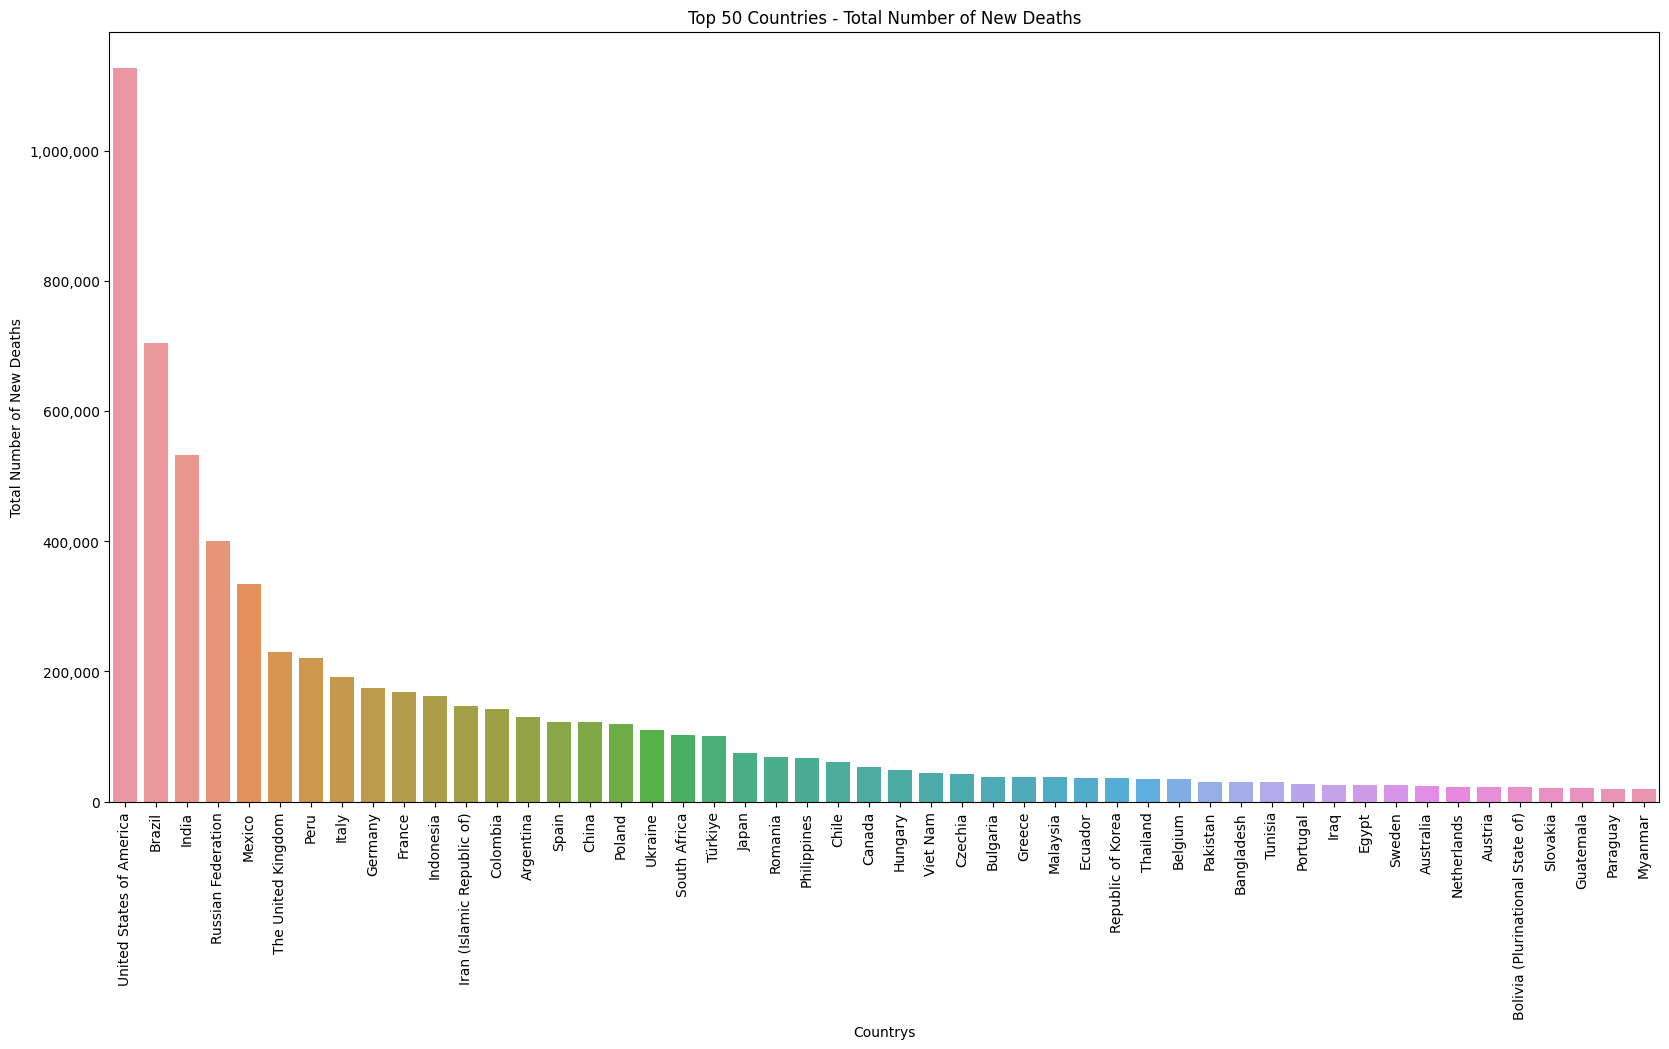

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x=country_deaths.index,y=country_deaths.values)
plt.title('Top 50 Countries - Total Number of New Deaths')  
plt.xlabel('Countrys')  
plt.ylabel('Total Number of New Deaths')  
plt.xticks(rotation=90)  
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}')) #Prints the values in the graph as integers
plt.show()

# Total number of cases and deaths by regions

In [15]:
region_cases=covid.groupby("WHO_region")["New_cases"].sum().sort_values(ascending=False)

In [16]:
region_cases

WHO_region
EURO     276134635
WPRO     207284734
AMRO     193286267
SEARO     61205037
EMRO      23394122
AFRO       9569874
Other          764
Name: New_cases, dtype: int64

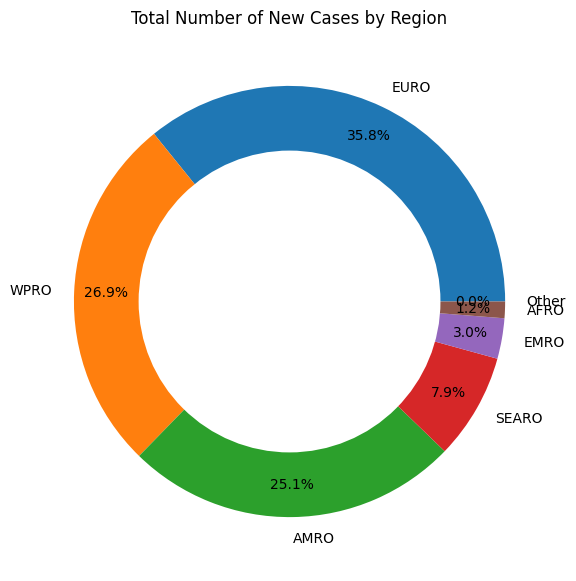

In [17]:
plt.figure(figsize=(15, 7))
plt.pie(region_cases.values, labels=region_cases.index, autopct='%1.1f%%', startangle=0, pctdistance=0.85)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  # Drawing a white circle in the center, making it hollow
plt.title('Total Number of New Cases by Region')
plt.show()

In [18]:
region_deaths=covid.groupby("WHO_region")["New_deaths"].sum()
region_deaths=region_deaths.sort_values(ascending=False)

In [19]:
region_deaths

WHO_region
AMRO     2959269
EURO     2248608
SEARO     806781
WPRO      417745
EMRO      351465
AFRO      175435
Other         13
Name: New_deaths, dtype: int64

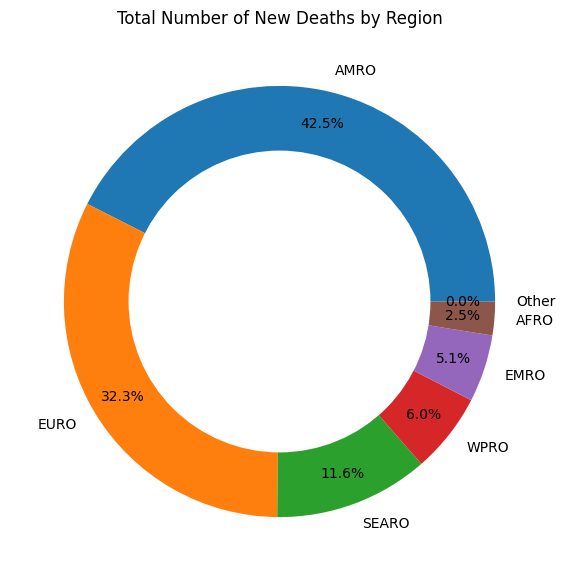

In [20]:
plt.figure(figsize=(15, 7))
plt.pie(region_deaths.values, labels=region_deaths.index, autopct='%1.1f%%', startangle=0, pctdistance=0.85)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  # Drawing a white circle in the center, making it hollow
plt.title('Total Number of New Deaths by Region')
plt.show()

# Ratio of cases to deaths by country and region

In [21]:
new_covid['Death_rate'] = (new_covid['New_deaths'] / new_covid['New_cases']) * 100


In [22]:
new_covid2=new_covid['Death_rate'].sort_values(ascending=False).head(70)

In [23]:
new_covid2

Country                           WHO_region
Yemen                             EMRO          18.074508
Sudan                             EMRO           7.885237
Syrian Arab Republic              EMRO           5.508246
Somalia                           EMRO           4.979147
Peru                              AMRO           4.900696
                                                  ...    
Mauritania                        AFRO           1.563750
Congo                             AFRO           1.543896
Nicaragua                         AMRO           1.527622
Ethiopia                          AFRO           1.511595
Democratic Republic of the Congo  AFRO           1.485379
Name: Death_rate, Length: 70, dtype: float64

In [24]:
countries = new_covid2.index.get_level_values(0) #We need to select lndex because it is #multiindex. A nice alternative to grouping


In [25]:
region_rate=new_covid2.groupby("WHO_region").sum().sort_values(ascending=False)

In [26]:
region_rate

WHO_region
AFRO     57.827292
EMRO     51.188006
AMRO     43.260355
EURO     23.524456
SEARO     7.926450
WPRO      3.821096
Other     1.701571
Name: Death_rate, dtype: float64

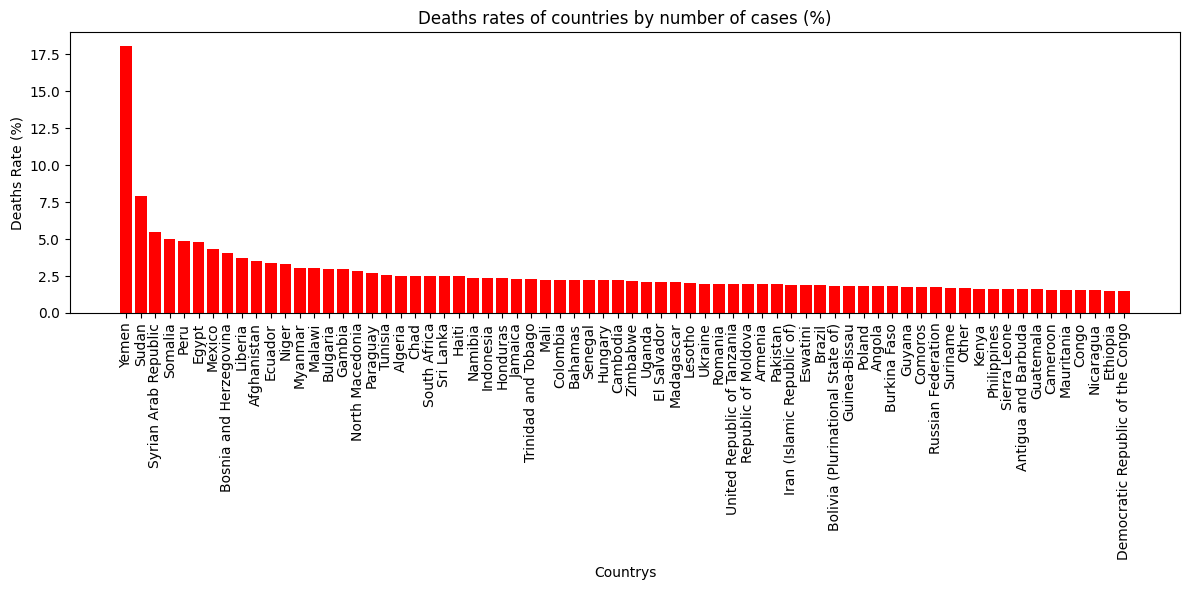

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(countries, new_covid2.values, color="red")  # 'Death_rate' sütunu gösteriliyor, isminiz farklıysa uygun isimle değiştirin
plt.title('Deaths rates of countries by number of cases (%)')
plt.xlabel('Countrys')
plt.ylabel('Deaths Rate (%)')
plt.xticks(rotation=90)  # x-ekseni etiketlerini 45 derece döndür
plt.tight_layout()
plt.show()

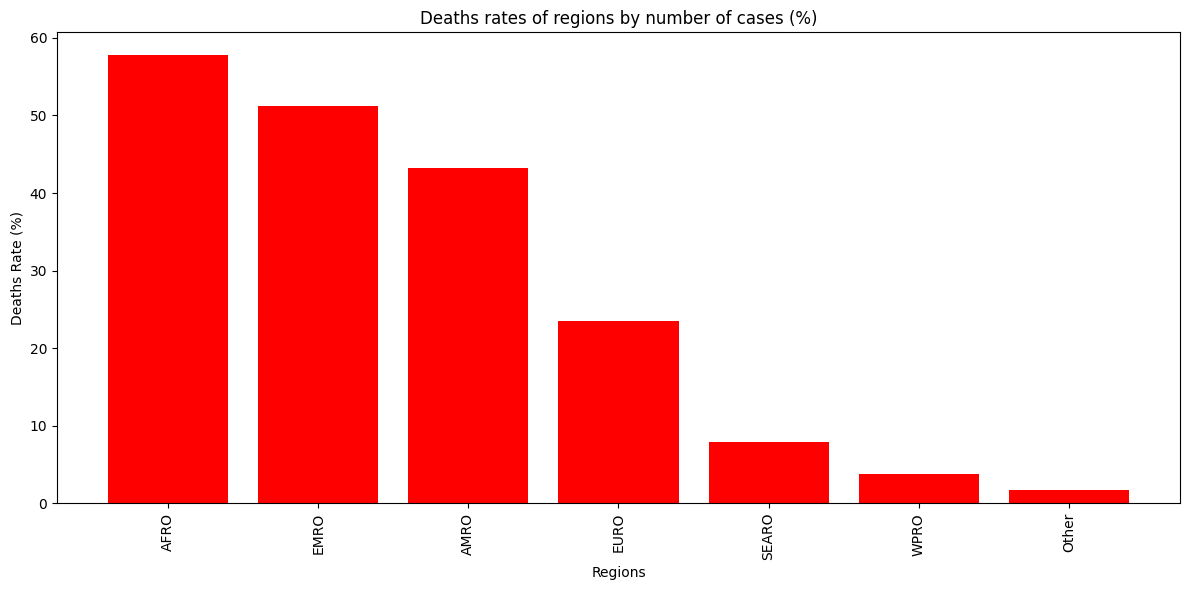

In [28]:
plt.figure(figsize=(12, 6))
plt.bar(region_rate.index, region_rate.values, color="red") 
plt.title('Deaths rates of regions by number of cases (%)')
plt.xlabel('Regions')
plt.ylabel('Deaths Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Vaccination Data Fields

In [29]:
vacc=pd.read_csv("/kaggle/input/who-covid-19-global-data/vaccination-data.csv")

In [30]:
vacc

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Argentina,ARG,AMRO,REPORTING,2022-10-07,109652736.0,41324100,242.617,91.434,37840119,83.725,NaN,2020-12-29,7.0,30810184.0,68.170
1,Australia,AUS,WPRO,REPORTING,2023-09-07,68653247.0,22201481,269.230,87.065,21610412,84.747,NaN,2021-02-21,5.0,14405773.0,56.493
2,Bahrain,BHR,EMRO,REPORTING,2022-12-21,3476633.0,1241174,204.319,72.943,1226796,72.098,NaN,2020-11-04,11.0,1008663.0,59.278
3,British Virgin Islands,VGB,AMRO,REPORTING,2023-06-02,41453.0,19466,137.094,64.378,18261,60.393,NaN,2021-02-11,3.0,3726.0,12.323
4,Egypt,EGY,EMRO,REPORTING,2023-05-21,112673535.0,56907319,110.103,55.609,42337175,41.371,NaN,2021-01-24,10.0,15217352.0,14.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Spain,ESP,EURO,REPORTING,2023-06-11,112837406.0,41328627,238.400,87.131,37483217,79.024,NaN,2020-12-30,4.0,26563654.0,56.003
225,Switzerland,CHE,EURO,REPORTING,2023-06-11,16755470.0,6096586,193.600,70.145,5723015,65.847,NaN,2020-12-23,6.0,4996200.0,57.484
226,Syrian Arab Republic,SYR,EMRO,REPORTING,2023-04-18,5090630.0,3295630,29.088,18.831,2358365,13.476,NaN,2021-04-01,11.0,75881.0,0.434
227,Timor-Leste,TLS,SEARO,REPORTING,2023-06-26,2019384.0,884194,153.164,67.063,799627,60.649,NaN,2021-04-07,4.0,335563.0,25.451


In [31]:
vacc.dtypes

COUNTRY                                  object
ISO3                                     object
WHO_REGION                               object
DATA_SOURCE                              object
DATE_UPDATED                             object
TOTAL_VACCINATIONS                      float64
PERSONS_VACCINATED_1PLUS_DOSE             int64
TOTAL_VACCINATIONS_PER100               float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100    float64
PERSONS_LAST_DOSE                         int64
PERSONS_LAST_DOSE_PER100                float64
VACCINES_USED                           float64
FIRST_VACCINE_DATE                       object
NUMBER_VACCINES_TYPES_USED              float64
PERSONS_BOOSTER_ADD_DOSE                float64
PERSONS_BOOSTER_ADD_DOSE_PER100         float64
dtype: object

# Vaccination map

In [32]:
vacc['FIRST_VACCINE_DATE'] = pd.to_datetime(vacc['FIRST_VACCINE_DATE']) #converted the date value from a string to a date value.


In [33]:
vacc['FIRST_VACCINE_DATE'].dtypes

dtype('<M8[ns]')

In [34]:
vacc_date=vacc.groupby("FIRST_VACCINE_DATE")["COUNTRY"].sum().sort_index(ascending=True).reset_index()

In [35]:
vacc_datee=vacc.groupby("COUNTRY")["FIRST_VACCINE_DATE"].min()

In [36]:
vacc_datee=vacc_datee.sort_values()

In [37]:

vacc_datee


COUNTRY
China                                          2020-07-22
Bahrain                                        2020-11-04
Lao People's Democratic Republic               2020-11-25
Canada                                         2020-12-14
United States of America                       2020-12-14
                                                  ...    
Saba                                                  NaT
Saint Helena, Ascension and Tristan da Cunha          NaT
Sint Eustatius                                        NaT
Turkey                                                NaT
United Arab Emirates                                  NaT
Name: FIRST_VACCINE_DATE, Length: 229, dtype: datetime64[ns]

In [38]:
fig = px.choropleth(vacc_datee, 
                   locations=vacc_datee.index,  
                   locationmode="country names",  
                   color=vacc_datee.values, 
                   color_continuous_scale= "Rainbow",
                   title="Total Vaccinations by Country",  
                   labels={"TOTAL_VACCINATIONS": "Total Vaccinations"}  
                   )

fig.update_geos(showcoastlines=True, coastlinecolor="black", showland=True, landcolor="white",
               showocean=True, oceancolor="lightblue", showcountries=True)
fig.show()

In [39]:
vacc_datee

COUNTRY
China                                          2020-07-22
Bahrain                                        2020-11-04
Lao People's Democratic Republic               2020-11-25
Canada                                         2020-12-14
United States of America                       2020-12-14
                                                  ...    
Saba                                                  NaT
Saint Helena, Ascension and Tristan da Cunha          NaT
Sint Eustatius                                        NaT
Turkey                                                NaT
United Arab Emirates                                  NaT
Name: FIRST_VACCINE_DATE, Length: 229, dtype: datetime64[ns]

# Vaccination rate by country

In [40]:
vacc["TOTAL_VACCINATIONS"]=vacc["TOTAL_VACCINATIONS"].astype(float)

In [41]:
pd.options.display.float_format = '{:,.0f}'.format #is used to display numbers in comma separated format.

In [42]:
total_vac=vacc.groupby("COUNTRY")["TOTAL_VACCINATIONS"].sum()
total_vac_max=total_vac.sort_values(ascending=False).head(30)
total_vac_min=total_vac.sort_values(ascending=False).tail(30)


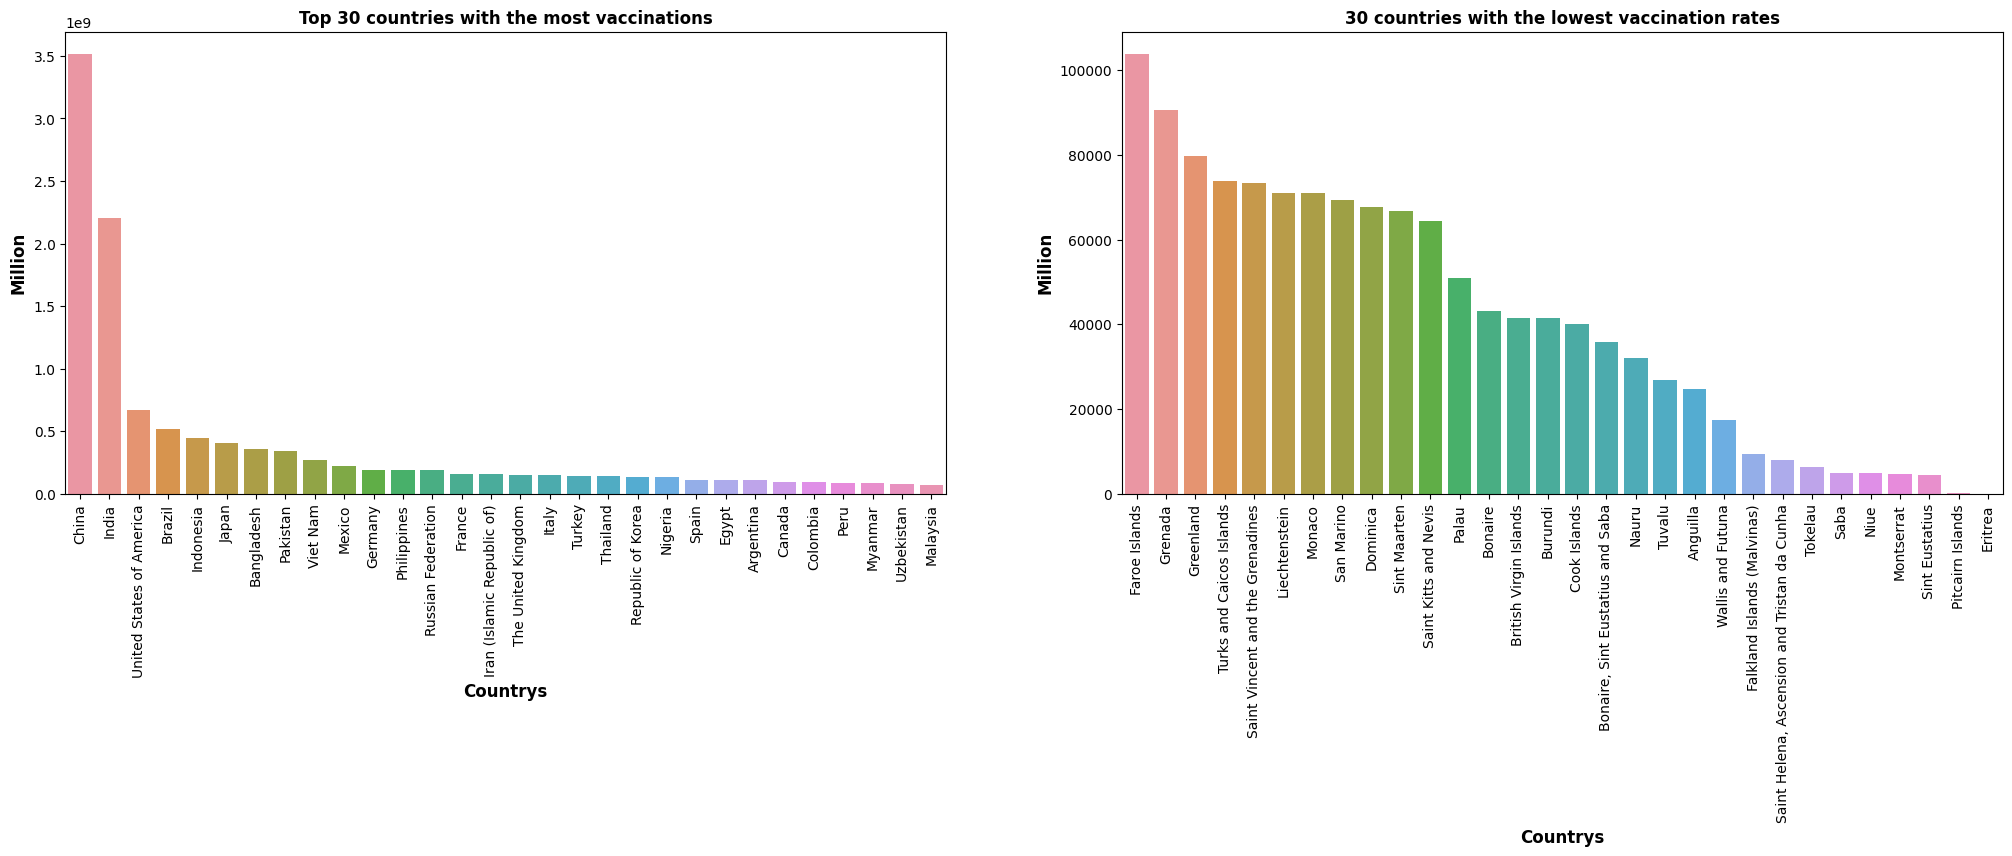

In [43]:
fig, ax = plt.subplots(1, 2, figsize=((25), 6))

ax[0].tick_params(axis='x', rotation=90)
sns.barplot(x=total_vac_max.index,y=total_vac_max.values,ax=ax[0])
ax[0].set_title('Top 30 countries with the most vaccinations',fontsize=12, fontweight='bold', color='black')
ax[0].set_xlabel('Countrys',fontsize=12, fontweight='bold', color="black")
ax[0].set_ylabel('Million',fontsize=12, fontweight='bold', color="black")

ax[1].tick_params(axis='x', rotation=90)
sns.barplot(x=total_vac_min.index,y=total_vac_min.values,ax=ax[1])
ax[1].set_title('30 countries with the lowest vaccination rates',fontsize=12, fontweight='bold', color="black")
ax[1].set_xlabel('Countrys',fontsize=12, fontweight='bold', color="black")
ax[1].set_ylabel('Million',fontsize=12, fontweight='bold', color="black")
plt.show()



# Vaccination rate by region

In [44]:
vacc_region=vacc.groupby("WHO_REGION")["TOTAL_VACCINATIONS"].sum()
vacc_region

WHO_REGION
AFRO      638,949,885
AMRO    2,127,861,011
EMRO      901,076,717
EURO    1,727,843,186
OTHER          71,104
SEARO   3,350,432,127
WPRO    4,759,028,447
Name: TOTAL_VACCINATIONS, dtype: float64

In [45]:
total_vac_max_region=vacc_region.sort_values(ascending=False).head(30)
total_vac_min_region=vacc_region.sort_values(ascending=False).tail(30)


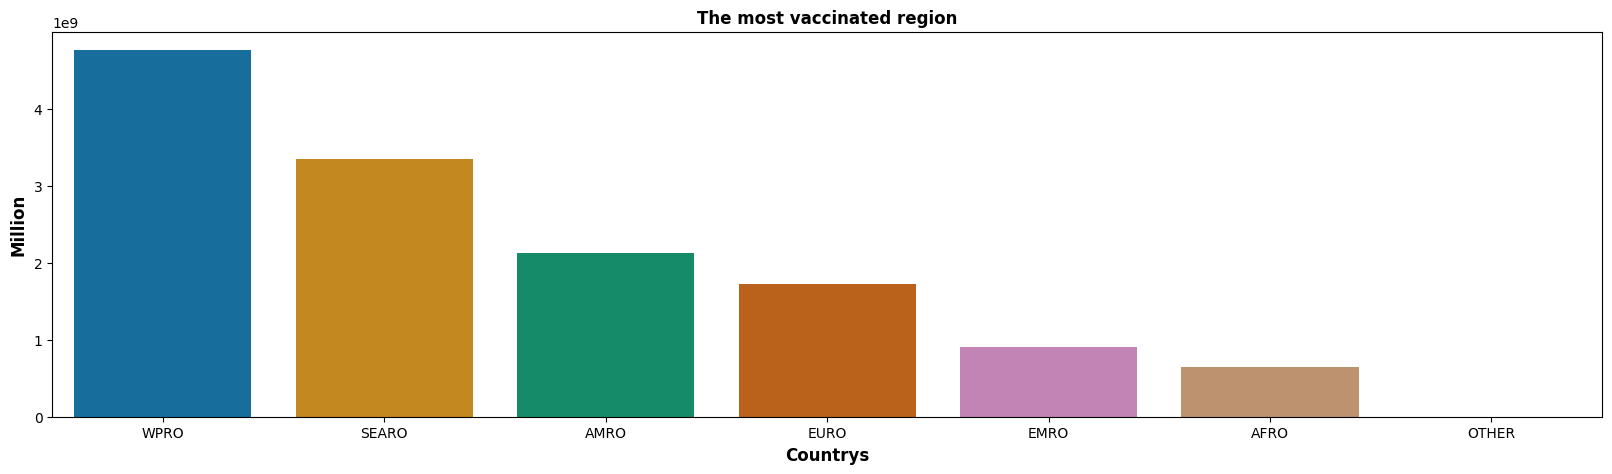

In [46]:
plt.figure(figsize=(20,5))
sns.barplot(x=total_vac_max_region.index,y=total_vac_max_region.values, palette="colorblind")
plt.title('The most vaccinated region',fontsize=12, fontweight='bold', color='black')
plt.xlabel('Countrys',fontsize=12, fontweight='bold', color="black")
plt.ylabel('Million',fontsize=12, fontweight='bold', color="black")
plt.show()


# Cumulative total vaccine doses administered per 100 population.

In [47]:
total_vacc_decimal= vacc.groupby("COUNTRY")["TOTAL_VACCINATIONS_PER100"].sum().sort_values(ascending=False).reset_index()

In [48]:
vacc

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Argentina,ARG,AMRO,REPORTING,2022-10-07,"109,652,736",41324100,243,91,37840119,84,NaN,2020-12-29,7,"30,810,184",68
1,Australia,AUS,WPRO,REPORTING,2023-09-07,"68,653,247",22201481,269,87,21610412,85,NaN,2021-02-21,5,"14,405,773",56
2,Bahrain,BHR,EMRO,REPORTING,2022-12-21,"3,476,633",1241174,204,73,1226796,72,NaN,2020-11-04,11,"1,008,663",59
3,British Virgin Islands,VGB,AMRO,REPORTING,2023-06-02,"41,453",19466,137,64,18261,60,NaN,2021-02-11,3,"3,726",12
4,Egypt,EGY,EMRO,REPORTING,2023-05-21,"112,673,535",56907319,110,56,42337175,41,NaN,2021-01-24,10,"15,217,352",15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Spain,ESP,EURO,REPORTING,2023-06-11,"112,837,406",41328627,238,87,37483217,79,NaN,2020-12-30,4,"26,563,654",56
225,Switzerland,CHE,EURO,REPORTING,2023-06-11,"16,755,470",6096586,194,70,5723015,66,NaN,2020-12-23,6,"4,996,200",57
226,Syrian Arab Republic,SYR,EMRO,REPORTING,2023-04-18,"5,090,630",3295630,29,19,2358365,13,NaN,2021-04-01,11,"75,881",0
227,Timor-Leste,TLS,SEARO,REPORTING,2023-06-26,"2,019,384",884194,153,67,799627,61,NaN,2021-04-07,4,"335,563",25


In [49]:
total_vacc_decimal

,COUNTRY,TOTAL_VACCINATIONS_PER100
0,Tokelau,470
1,Gibraltar,394
2,Chile,347
3,Cuba,336
4,Japan,322
...,...,...
224,Kosovo,0
225,Bosnia and Herzegovina,0
226,Turkey,0
227,Republic of Moldova,0


In [50]:
df=pd.DataFrame(total_vacc_decimal)

In [51]:
import plotly.express as px

fig = px.choropleth(df, 
                    locations="COUNTRY", 
                    locationmode="country names",
                    color="TOTAL_VACCINATIONS_PER100",
                    color_continuous_scale="Viridis",
                    title="Total Vaccinations by Country",
                    labels={"TOTAL_VACCINATIONS": "Total Vaccinations"}
                    )

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white",
                showocean=True, oceancolor="lightblue", showcountries=True)

fig.show()